In [85]:
import tensorflow as tf
import keras

In [86]:
dataset=keras.datasets.fashion_mnist.load_data()

In [87]:
(x_train, y_train), (x_test, y_test) = dataset
x_train = x_train / 255.0
x_test = x_test / 255.0


In [88]:
x_train = tf.convert_to_tensor(x_train,dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test,dtype=tf.float32)


x_train_tensor = tf.data.Dataset.from_tensor_slices(x_train)
x_test_tensor = tf.data.Dataset.from_tensor_slices(x_test)

x_train_tensor = x_train_tensor.batch(32).prefetch(1)
x_test_tensor = x_test_tensor.batch(32).prefetch(1)


In [89]:
for data in x_train_tensor:
    print(data.shape)
    break

(32, 28, 28)


In [90]:
generator = tf.keras.Sequential([
    keras.layers.Dense(7*7*128,input_shape=[100]),
    keras.layers.Reshape([7,7,128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64,kernel_size=5,strides=2,padding="same",activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1,kernel_size=5,strides=2,activation="selu",padding="same")

])


discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64,kernel_size=5,strides=2,padding="same",activation=keras.layers.LeakyReLU(0.2),input_shape=[28,28,1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128,kernel_size=5,strides=2,padding="same",activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1,activation="sigmoid")
])

gan = keras.models.Sequential([generator,discriminator])

discriminator.compile(loss="binary_crossentropy",optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy",optimizer="rmsprop")

In [94]:
def train_gan(gan,dataset,batch_size,n_epochs):
    generator,discriminator = gan.layers
    for epoch in range(n_epochs):
      print(f"epochs: {epoch}")
      for images_lote in dataset:
              noise = tf.random.normal(shape=[batch_size,100])
              images_lote = tf.expand_dims(images_lote,axis=-1)
              generated_images = generator(noise)
              x_fake_and_real = tf.concat([generated_images, images_lote], axis=0)
              y1 = tf.concat([[0.]] * batch_size + [[1.]] * batch_size, axis=0)
              discriminator.trainable = True
              discriminator.train_on_batch(x_fake_and_real, y1)
              noise = tf.random.normal(shape=[batch_size,100])
              y2 = tf.constant([[1.]] * batch_size)
              discriminator.trainable = False
              gan.train_on_batch(noise, y2)

train_gan(gan,x_train_tensor,32,1000)


epochs: 0
epochs: 1
epochs: 2
epochs: 3


2025-06-10 20:31:39.811388: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epochs: 4
epochs: 5
epochs: 6
epochs: 7
epochs: 8
epochs: 9
epochs: 10
epochs: 11


2025-06-10 20:40:44.234978: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epochs: 12
epochs: 13
epochs: 14
epochs: 15
epochs: 16
epochs: 17
epochs: 18
epochs: 19
epochs: 20
epochs: 21
epochs: 22
epochs: 23
epochs: 24
epochs: 25
epochs: 26
epochs: 27


2025-06-10 20:58:59.487054: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epochs: 28
epochs: 29
epochs: 30
epochs: 31
epochs: 32
epochs: 33
epochs: 34
epochs: 35
epochs: 36
epochs: 37
epochs: 38
epochs: 39
epochs: 40
epochs: 41
epochs: 42
epochs: 43
epochs: 44
epochs: 45
epochs: 46
epochs: 47
epochs: 48
epochs: 49
epochs: 50
epochs: 51
epochs: 52
epochs: 53
epochs: 54
epochs: 55
epochs: 56
epochs: 57
epochs: 58
epochs: 59


2025-06-10 21:35:49.912777: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epochs: 60
epochs: 61
epochs: 62
epochs: 63
epochs: 64
epochs: 65
epochs: 66
epochs: 67
epochs: 68
epochs: 69
epochs: 70
epochs: 71
epochs: 72
epochs: 73
epochs: 74
epochs: 75
epochs: 76
epochs: 77
epochs: 78
epochs: 79
epochs: 80
epochs: 81
epochs: 82
epochs: 83
epochs: 84
epochs: 85
epochs: 86
epochs: 87
epochs: 88
epochs: 89
epochs: 90
epochs: 91
epochs: 92
epochs: 93
epochs: 94
epochs: 95
epochs: 96
epochs: 97
epochs: 98
epochs: 99
epochs: 100
epochs: 101
epochs: 102
epochs: 103
epochs: 104
epochs: 105
epochs: 106
epochs: 107
epochs: 108
epochs: 109
epochs: 110
epochs: 111
epochs: 112
epochs: 113
epochs: 114
epochs: 115
epochs: 116
epochs: 117
epochs: 118
epochs: 119
epochs: 120
epochs: 121
epochs: 122
epochs: 123


2025-06-10 22:48:56.469988: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epochs: 124
epochs: 125
epochs: 126
epochs: 127
epochs: 128
epochs: 129
epochs: 130
epochs: 131
epochs: 132
epochs: 133
epochs: 134
epochs: 135
epochs: 136
epochs: 137
epochs: 138
epochs: 139
epochs: 140
epochs: 141
epochs: 142
epochs: 143
epochs: 144
epochs: 145
epochs: 146
epochs: 147
epochs: 148
epochs: 149
epochs: 150
epochs: 151
epochs: 152
epochs: 153
epochs: 154
epochs: 155
epochs: 156
epochs: 157
epochs: 158
epochs: 159
epochs: 160
epochs: 161
epochs: 162
epochs: 163
epochs: 164
epochs: 165
epochs: 166
epochs: 167
epochs: 168
epochs: 169
epochs: 170
epochs: 171
epochs: 172
epochs: 173
epochs: 174
epochs: 175
epochs: 176
epochs: 177
epochs: 178
epochs: 179
epochs: 180
epochs: 181
epochs: 182
epochs: 183
epochs: 184
epochs: 185
epochs: 186
epochs: 187
epochs: 188
epochs: 189
epochs: 190
epochs: 191
epochs: 192
epochs: 193
epochs: 194
epochs: 195
epochs: 196
epochs: 197
epochs: 198
epochs: 199
epochs: 200
epochs: 201
epochs: 202
epochs: 203
epochs: 204
epochs: 205
epochs: 206
epoc

2025-06-11 01:15:33.788946: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epochs: 252
epochs: 253
epochs: 254
epochs: 255
epochs: 256
epochs: 257
epochs: 258
epochs: 259
epochs: 260
epochs: 261
epochs: 262
epochs: 263
epochs: 264
epochs: 265
epochs: 266
epochs: 267
epochs: 268
epochs: 269
epochs: 270
epochs: 271
epochs: 272
epochs: 273
epochs: 274
epochs: 275
epochs: 276
epochs: 277
epochs: 278
epochs: 279
epochs: 280
epochs: 281
epochs: 282
epochs: 283
epochs: 284
epochs: 285
epochs: 286
epochs: 287
epochs: 288
epochs: 289
epochs: 290
epochs: 291
epochs: 292
epochs: 293
epochs: 294
epochs: 295
epochs: 296
epochs: 297
epochs: 298
epochs: 299
epochs: 300
epochs: 301
epochs: 302
epochs: 303
epochs: 304
epochs: 305
epochs: 306
epochs: 307
epochs: 308
epochs: 309
epochs: 310
epochs: 311
epochs: 312
epochs: 313
epochs: 314
epochs: 315
epochs: 316
epochs: 317
epochs: 318
epochs: 319
epochs: 320
epochs: 321
epochs: 322
epochs: 323
epochs: 324
epochs: 325
epochs: 326
epochs: 327
epochs: 328
epochs: 329
epochs: 330
epochs: 331
epochs: 332
epochs: 333
epochs: 334
epoc

2025-06-11 06:08:51.264452: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


epochs: 508
epochs: 509
epochs: 510
epochs: 511
epochs: 512
epochs: 513
epochs: 514
epochs: 515
epochs: 516
epochs: 517
epochs: 518
epochs: 519
epochs: 520
epochs: 521
epochs: 522
epochs: 523
epochs: 524
epochs: 525
epochs: 526
epochs: 527
epochs: 528
epochs: 529
epochs: 530
epochs: 531
epochs: 532
epochs: 533
epochs: 534
epochs: 535
epochs: 536
epochs: 537
epochs: 538
epochs: 539
epochs: 540
epochs: 541
epochs: 542
epochs: 543
epochs: 544
epochs: 545
epochs: 546
epochs: 547
epochs: 548
epochs: 549
epochs: 550
epochs: 551
epochs: 552
epochs: 553
epochs: 554
epochs: 555
epochs: 556
epochs: 557
epochs: 558
epochs: 559
epochs: 560
epochs: 561
epochs: 562
epochs: 563
epochs: 564
epochs: 565
epochs: 566
epochs: 567
epochs: 568
epochs: 569
epochs: 570
epochs: 571
epochs: 572
epochs: 573
epochs: 574
epochs: 575
epochs: 576
epochs: 577
epochs: 578
epochs: 579
epochs: 580
epochs: 581
epochs: 582
epochs: 583
epochs: 584
epochs: 585
epochs: 586
epochs: 587
epochs: 588
epochs: 589
epochs: 590
epoc

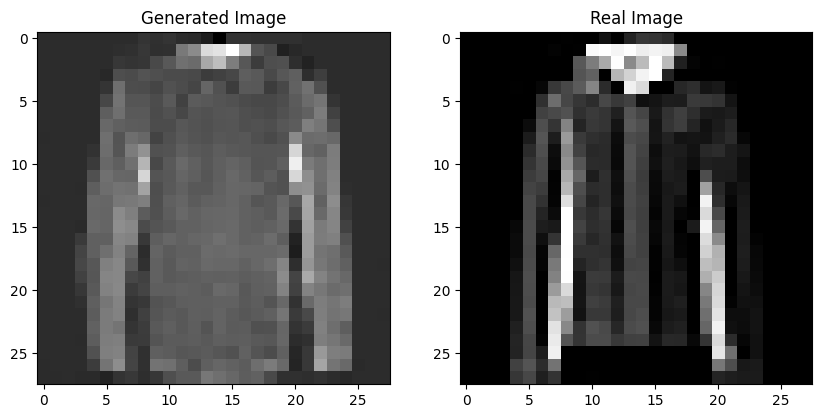

In [276]:
import matplotlib.pyplot as plt
noise_test = tf.random.normal(shape=[1,100])
image_test = generator(noise_test)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_test[0, :, :, 0], cmap="gray")
plt.title("Generated Image")
plt.subplot(1, 2, 2)
plt.imshow(x_test[6], cmap="gray")
plt.title("Real Image")
plt.show()
